# Differential Method for Solving Ordinary Differential Equations

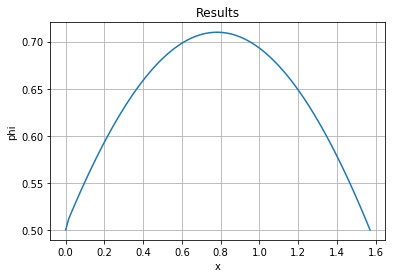

In [38]:
"""

Created by Yanxing Li on 2018/5/8.
Copyright © 2018 WATT LEE. All rights reserved.

"""
import numpy as np
import math
import matplotlib.pyplot as plt

tor = 0.01

class results:
    x = []
    y = []
    def __init__(self,x,y):
        self.x = x
        self.y = y
"""
@brief: Triangular matrix chasing method
@param: a       the bottom diagonal of magrix
@param: b       the middle diagonal of matrix
@param: c       the top diagonal of matrix
@param: f       coefficient matrix
@return: x      unknown variable
"""   
def TriangleMatrixFun(a,b,c,f): 
    n = len(f)
    d = np.zeros(n)
    d[0] = b[0]
    u = np.zeros(n)
    x = np.zeros(n)
    y = np.zeros(n)
    for i in range(0,n-1):
        u[i]=c[i]/d[i]
        d[i+1]=b[i+1]-a[i+1]*u[i]
        
    y[0]= f[0]/d[0]
    
    for i in range(1,n):
        y[i]=(f[i]-a[i]*y[i-1])/d[i]
    
    x[n-1]=y[n-1]
    
    for i in range(n-2,-1,-1):
        x[i]=y[i]-u[i]*x[i+1]
    return x

"""
@brief: The Differential Decomposition Method for Boundary Value Problem of Ordinary Differential Equations
@param: a             boundary a
@param: b             boundary b
@param: n             num of parts
@param: alpha         y(a)=alpha
@param: beta          y(b)=beta
@param: px,qx,fx      y''+p(x)y'+q(x)y = f(x)
@return: res          results
"""
def difference_solve(n,a,b,alpha,beta,px,qx,fx):
    h = (b-a)/n
    x = np.arange(a,b+h,h)
    p = []
    q = []
    f = []
    aa = []
    bb = []
    cc = []
    y = []
    y.append(alpha)
    for i in range(0,n-1):
        q.append(qx(x[i]))
        p.append(px(x[i]))
        f.append(fx(x[i]))
    f[0] = -1/h/(h-1)
    aa.append(0)
    for i in range(1,n-1):
        aa.append(1/(h**2)-1/2/h*p[i])
    for i in range(0,n-2):
        cc.append(1/(h**2)+1/2/h*p[i])
    cc.append(0)
    for i in range(0,n-1):
        bb.append(-2/(h**2)+q[i])
    bb[0]=-2/h**2+1-1/h**2/(h-1)
    bb[n-2]=-2/h**2+1+1/h**2/(h+1)
    y.extend(TriangleMatrixFun(aa,bb,cc,f))
    y.append(beta)
    res = results(x,y)
    return res

def qx(x):
    return 1
def px(x):
    return 0
def fx(x):
    return 0

res = difference_solve(100,0,math.pi/2,0.5,0.5,px,qx,fx)
plot1=plt.plot(res.x, res.y)
plt.xlabel('x')
plt.ylabel('phi')
plt.grid(True)
plt.legend(loc=4)
plt.title('Results')
plt.show() 

# One-Dimensional Finite Potential Well 

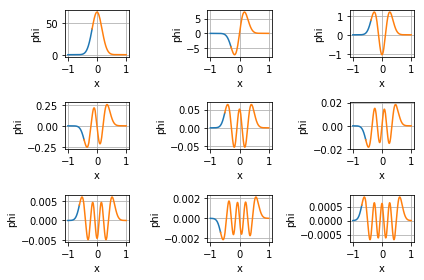

In [1]:
"""

Created by Yanxing Li on 2018/5/8.
Copyright © 2018 WATT LEE. All rights reserved.

"""

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from pylab import *

tol = 1e-6
dpsi0=0.5
n = 1000
e1 = -1

class data:
    x = []
    y = []
    def __init__(self,x,y):
        self.x = x
        self.y = y
"""
@brief: the differential equation
"""
def func(y,x):
    return array([y[1],50**2*(-e1-1+x**2/2)*y[0]])
"""
@brief: OdeSolve function
@param: f       derived function
@param: a       the initial value of x
@param: b       the last value of x
@param: alpha   the first value of y
@param: m       the derivative on x=a
@param: k       number of intervals
@return: y[:,0] the value of y
"""
def OdeSolve(f,a,b,alpha,m,n): 
    x = linspace(a,b,n)
    yinit = array([alpha,m])
    y = odeint(f,yinit,x)
    datas = data(x,y)
    return datas

for i in range(1,10):
    delta = 2*tol
    de = 2*tol
    e1 = e1 + abs(e1)/70
    while abs(delta) > tol :
        xturn = -sqrt(abs(2*(e1+1)))
        k = 0.0001*np.power(-1,i+1)
        res1 = OdeSolve(func,-1,xturn,0,k,n)
        res2 = OdeSolve(func,1,xturn,0,-0.0001,n)
        y1 = res1.y
        y2 = res2.y
        dpsi = y1[n-1,1]-y2[n-1,1]
        delta = -dpsi*delta/(dpsi-dpsi0)
        dpsi0 = dpsi
        e1 = e1 + delta
    subplot(3,3,i)
    plt.plot(res1.x,y1[:,0],res2.x,y2[:,0],label='n ='+str(i))
    plt.xlabel('x')
    plt.ylabel('phi')
    plt.grid(True)
    plt.tight_layout()
plt.show()


# Schrodinger's Equation of Three-Dimensional Infinite Well

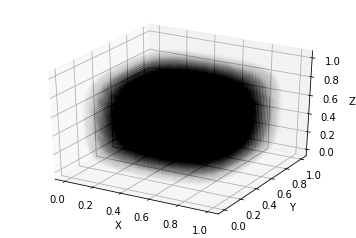

In [39]:
"""
    Created by Yanxing Li on 2018/5/7.
    Copyright © 2018 WATT LEE. All rights reserved.
    """

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

n = 1

class data:
    x = []
    y = []
    def __init__(self,x,y):
        self.x = x
        self.y = y
"""
    @brief: the differential equation
    """
def func(y,x):
    return array([y[1],-(n**2*math.pi**2*y[0])])
"""
    @brief: OdeSolve function
    @param: f       derived function
    @param: a       the initial value of x
    @param: b       the last value of x
    @param: alpha   the first value of y
    @param: m       the derivative on x=a
    @param: k       number of intervals
    @return: y[:,0] the value of y
    """
def OdeSolve(f,a,b,alpha,m,k):
    x = linspace(a,b,k)
    yinit = array([alpha,m])
    y = odeint(f,yinit,x)
    return y[:,0]

"""
    @brief: shootev
    @param: n       num
    @param: a       the initial value of x
    @param: b       the last value of x
    @param: func    the differential equation
    @param: alpha   the first value of y
    @param: beta    the last value of y
    @param: m1      the guessed derivative on x=a
    @param: tor     tolerence
    @return: x      selceted x value
    @return: y      solved y value
    """
def shootev(k,a,b,alpha,beta,m1,tor):
    m = []
    yb = []
    x = linspace(a,b,k)
    m.append(m1)
    y = OdeSolve(func,a,b,alpha,m[0],k)
    yb.append(y[k-1])
    if abs(yb[0]-beta) >= tor:
        m.append(m[0]*beta/yb[0])
        y = OdeSolve(func,a,b,alpha,m[1],k)
        yb.append(y[k-1])
        i = 1
        while abs(yb[i]-beta) >= tor :
            l = len(m)
            m.append(m[l-1]+(beta-yb[i])*(m[l-1]-m[l-2])/(yb[i]-yb[i-1]))
            y = OdeSolve(func,a,b,alpha,m[i+1],k)
            yb.append(y[k-1])
            i = i + 1
        datas = data(x,y)
        return datas
    else:
        datas = data(x,y)
        return datas


res = shootev(50,0,1,0,0,np.sqrt(2)*math.pi*n-0.1,1e-6)

ax = plt.subplot(111, projection='3d')
for x in range(0,len(res.x)):
    for y in range(0,len(res.x)):
        for z in range(0,len(res.x)):
            psi = res.y[x]*res.y[y]*res.y[z]
            ax.scatter(res.x[x],res.x[y],res.x[z],c = 'black',alpha = psi/50)
ax.set_zlabel('Z')
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()
